In [1]:
import pandas as pd
import numpy as np
from scipy.stats import wilcoxon, binomtest

In [2]:
sheets = pd.read_excel("Responses.xlsx", sheet_name=None)
del sheets['Master Sheet']
print(list(sheets.keys()))
print(list(sheets['Scenario 1 Clip B Oracle'].keys()))
sheets['Scenario 1 Clip B Oracle']

['Scenario 1 Clip A Oracle', 'Scenario 1 Clip B Oracle', 'Scenario 2 Clip A Oracle', 'Scenario 2 Clip B Oracle', 'Scenario 3 Clip A Oracle', 'Scenario 3 Clip B Oracle']
['Timestamp', 'What is your familiarity with robotics?', 'The robot’s behavior was natural.', 'I clearly understood what the robot was trying to communicate.', 'The robot appeared competent in performing the behavior.', 'The behavior matched what I would expect for this situation.', "The robot's movement looked realistic.", 'I would trust the robot to perform this action in a real interaction.', 'The robot’s behavior was natural..1', 'I clearly understood what the robot was trying to communicate..1', 'The robot appeared competent in performing the behavior..1', 'The behavior matched what I would expect for this situation..1', "The robot's movement looked realistic..1", 'I would trust the robot to perform this action in a real interaction..1', 'Which clip did you prefer?', 'Why do you prefer the clip you chose in the pre

,Timestamp,What is your familiarity with robotics?,The robot’s behavior was natural.,I clearly understood what the robot was trying to communicate.,The robot appeared competent in performing the behavior.,The behavior matched what I would expect for this situation.,The robot's movement looked realistic.,I would trust the robot to perform this action in a real interaction.,The robot’s behavior was natural..1,I clearly understood what the robot was trying to communicate..1,The robot appeared competent in performing the behavior..1,The behavior matched what I would expect for this situation..1,The robot's movement looked realistic..1,I would trust the robot to perform this action in a real interaction..1,Which clip did you prefer?,Why do you prefer the clip you chose in the previous question? (Optional)
0,2025-12-05 15:00:00.595,"I am familiar with robotics, but I don't know ...",Neutral,Slightly Agree,Slightly Agree,Agree,Agree,Strongly Agree,Agree,Agree,Agree,Agree,Agree,Agree,Clip B,The head moves.
1,2025-12-05 15:27:46.190,I have taken classes in robotics and am quite ...,Neutral,Agree,Neutral,Agree,Slightly Agree,Slightly Agree,Neutral,Agree,Neutral,Agree,Slightly Agree,Slightly Agree,Clip A,"honestly, they seemed the same"
2,2025-12-05 15:31:03.515,I have no familiarity with robotics.,Agree,Strongly Agree,Agree,Agree,Slightly Agree,Strongly Agree,Agree,Strongly Agree,Agree,Strongly Agree,Slightly Agree,Strongly Agree,Clip A,NaN
3,2025-12-05 15:47:28.864,I am a robotics researcher and am familiar wit...,Slightly Agree,Strongly Agree,Agree,Strongly Agree,Neutral,Agree,Slightly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Neutral,Strongly Agree,Clip A,Clip B included a head nod but it looked weird
4,2025-12-05 16:43:05.488,I have taken classes in robotics and am quite ...,Slightly Disagree,Slightly Agree,Strongly Agree,Slightly Agree,Disagree,Strongly Disagree,Agree,Agree,Strongly Agree,Slightly Agree,Slightly Agree,Slightly Disagree,Clip B,NaN
5,2025-12-05 17:09:26.583,"I am familiar with robotics, but I don't know ...",Disagree,Agree,Agree,Neutral,Slightly Disagree,Neutral,Disagree,Agree,Neutral,Neutral,Disagree,Neutral,Clip B,the arm movement
6,2025-12-05 17:42:21.189,I am a robotics researcher and am familiar wit...,Agree,Strongly Agree,Agree,Slightly Agree,Slightly Agree,Slightly Disagree,Strongly Agree,Strongly Agree,Agree,Slightly Agree,Agree,Disagree,Clip B,I prefer the version with additional non-verba...
7,2025-12-05 20:10:05.722,"I am familiar with robotics, but I don't know ...",Strongly Agree,Strongly Agree,Slightly Agree,Agree,Agree,Slightly Agree,Slightly Agree,Agree,Agree,Agree,Agree,Agree,Clip B,NaN


In [3]:
LIKERT_QUESTIONS_1 = [c for c in sheets['Scenario 1 Clip A Oracle'].columns if c.endswith(".1")]
LIKERT_QUESTIONS   = [c[:-2] for c in LIKERT_QUESTIONS_1]
data = {}
for i in range(1, 4):
    oracle_first = sheets[f'Scenario {i} Clip A Oracle']
    oracle_last  = sheets[f'Scenario {i} Clip B Oracle']
    scenario_likert = {
        'oracle': pd.concat((oracle_first[LIKERT_QUESTIONS],   oracle_last[LIKERT_QUESTIONS_1].rename(columns=lambda c: c[:-2]))),
        'genem' : pd.concat((oracle_first[LIKERT_QUESTIONS_1].rename(columns=lambda c: c[:-2]), oracle_last[LIKERT_QUESTIONS])) 
    }
    data[f'Scenario {i}'] = scenario_likert

df = pd.DataFrame(data)
df['Scenario 1']['genem']

,The robot’s behavior was natural.,I clearly understood what the robot was trying to communicate.,The robot appeared competent in performing the behavior.,The behavior matched what I would expect for this situation.,The robot's movement looked realistic.,I would trust the robot to perform this action in a real interaction.
0,Disagree,Neutral,Disagree,Disagree,Slightly Disagree,Slightly Disagree
1,Disagree,Agree,Disagree,Slightly Disagree,Strongly Disagree,Strongly Disagree
2,Strongly Agree,Agree,Slightly Agree,Neutral,Slightly Disagree,Slightly Disagree
3,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree,Strongly Disagree
4,Slightly Disagree,Slightly Agree,Slightly Agree,Neutral,Agree,Agree
5,Disagree,Slightly Agree,Agree,Slightly Agree,Slightly Disagree,Agree
6,Slightly Disagree,Slightly Agree,Slightly Disagree,Slightly Disagree,Slightly Disagree,Slightly Disagree
7,Disagree,Agree,Agree,Agree,Slightly Disagree,Agree
8,Slightly Agree,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree
9,Slightly Disagree,Slightly Agree,Neutral,Neutral,Slightly Disagree,Neutral


In [4]:
likert_map = lambda arg: {
    "Strongly Disagree"   : 1,
    "Disagree"            : 2,
    "Slightly Disagree"   : 3,
    "Neutral"             : 4,
    "Slightly Agree"      : 5,
    "Agree"               : 6,
    "Strongly Agree"      : 7
}[arg]

In [5]:
diff1 = df['Scenario 1']['oracle'].map(likert_map) - df['Scenario 1']['genem'].map(likert_map)
diff2 = df['Scenario 2']['oracle'].map(likert_map) - df['Scenario 2']['genem'].map(likert_map)
diff3 = df['Scenario 3']['oracle'].map(likert_map) - df['Scenario 3']['genem'].map(likert_map)
diff1

,The robot’s behavior was natural.,I clearly understood what the robot was trying to communicate.,The robot appeared competent in performing the behavior.,The behavior matched what I would expect for this situation.,The robot's movement looked realistic.,I would trust the robot to perform this action in a real interaction.
0,5,1,4,3,3,2
1,4,1,5,3,5,5
2,0,0,0,-1,1,1
3,0,0,0,0,0,0
4,-1,0,0,0,0,0
5,-1,0,-1,-3,-1,0
6,1,1,2,2,2,1
7,0,1,0,0,2,0
8,0,0,0,0,-2,0
9,3,1,2,2,3,2


In [6]:
stats = {'Scenario 1': {}, 'Scenario 2': {}, 'Scenario 3': {}}
ps    = {'Scenario 1': {}, 'Scenario 2': {}, 'Scenario 3': {}}
dir   = {'Scenario 1': {}, 'Scenario 2': {}, 'Scenario 3': {}}
for idx, diff in enumerate((diff1, diff2, diff3)):
    for question in LIKERT_QUESTIONS:
        stat, p = wilcoxon(diff[question])
        W_pos = np.sum(diff[question] > 0)
        W_neg = np.sum(diff[question] < 0)
        if W_pos > W_neg: direction = 'oracle'
        elif W_pos < W_neg: direction = 'genem'
        else: direction = 'equal'
        stats[f'Scenario {idx + 1}'][question] = stat
        ps[f'Scenario {idx + 1}'][question]    = p
        dir[f'Scenario {idx + 1}'][question]   = direction
stats = pd.DataFrame(stats)
ps    = pd.DataFrame(ps)
dir   = pd.DataFrame(dir)

In [7]:
stats

,Scenario 1,Scenario 2,Scenario 3
The robot’s behavior was natural.,23.0,54.0,7.0
I clearly understood what the robot was trying to communicate.,4.5,36.5,11.0
The robot appeared competent in performing the behavior.,17.0,36.0,19.5
The behavior matched what I would expect for this situation.,15.0,45.0,0.0
The robot's movement looked realistic.,18.5,54.0,22.0
I would trust the robot to perform this action in a real interaction.,7.0,13.0,2.0


In [8]:
ps

,Scenario 1,Scenario 2,Scenario 3
The robot’s behavior was natural.,0.058434,0.461683,0.002417
I clearly understood what the robot was trying to communicate.,0.033895,0.303706,0.084751
The robot appeared competent in performing the behavior.,0.077214,0.490124,0.030626
The behavior matched what I would expect for this situation.,0.369171,0.227040,0.000599
The robot's movement looked realistic.,0.055853,0.724018,0.053612
I would trust the robot to perform this action in a real interaction.,0.031987,0.251901,0.001927


In [9]:
dir

,Scenario 1,Scenario 2,Scenario 3
The robot’s behavior was natural.,oracle,genem,genem
I clearly understood what the robot was trying to communicate.,oracle,oracle,genem
The robot appeared competent in performing the behavior.,oracle,oracle,genem
The behavior matched what I would expect for this situation.,oracle,oracle,genem
The robot's movement looked realistic.,oracle,genem,genem
I would trust the robot to perform this action in a real interaction.,oracle,oracle,genem


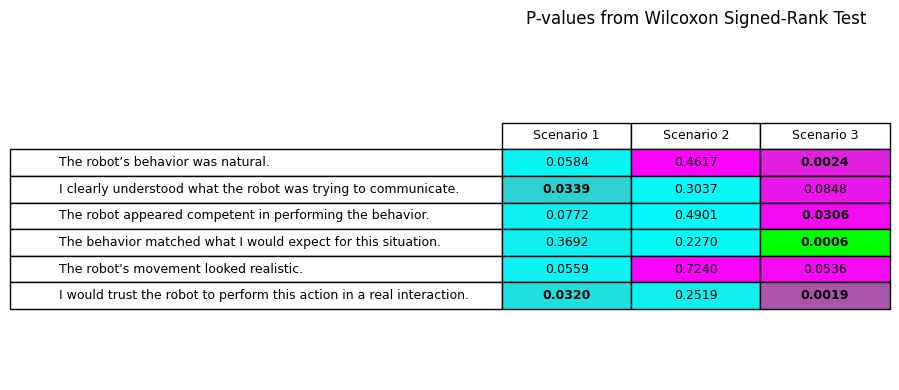

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

cell_text = ps.map(lambda x: f"{x:.4f}").values
cell_colors = []
for i in range(ps.shape[0]):
    row_colors = []
    for j in range(ps.shape[1]):
        if dir.iloc[i, j] == 'oracle':
            r = 1 / (1 + stats.iloc[i, j])
            row_colors.append([r, 1 - r, 1 - r])
        elif dir.iloc[i, j] == 'genem':
            r = 1 / (1 + stats.iloc[i, j])
            row_colors.append([1 - r, r, 1])
    cell_colors.append(row_colors)

table = ax.table(
    cellText=cell_text,
    rowLabels=ps.index,
    colLabels=ps.columns,
    cellLoc='center',
    loc='center',
    cellColours=cell_colors
)
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Bold cells with p < 0.05
for i in range(ps.shape[0]):
    for j in range(ps.shape[1]):
        if ps.iloc[i, j] < 0.05:
            table[(i + 1, j)].set_text_props(fontweight='bold')

plt.title("P-values from Wilcoxon Signed-Rank Test", fontsize=12, pad=20)
plt.tight_layout()
plt.show()

-------

In [11]:
PREFER = 'Which clip did you prefer?'
preferences = {'Scenario 1': {}, 'Scenario 2': {}, 'Scenario 3': {}}

for i in range(1, 4):
    preferences[f'Scenario {i}']['oracle'] = sheets[f'Scenario {i} Clip A Oracle'][PREFER].eq('Clip A').sum() + sheets[f'Scenario {i} Clip B Oracle'][PREFER].eq('Clip B').sum()
    preferences[f'Scenario {i}']['genem']  = sheets[f'Scenario {i} Clip A Oracle'][PREFER].eq('Clip B').sum() + sheets[f'Scenario {i} Clip B Oracle'][PREFER].eq('Clip A').sum()

In [12]:
for i in range(1,4):
    k = preferences[f'Scenario {i}']['oracle']
    n = preferences[f'Scenario {i}']['oracle'] + preferences[f'Scenario {i}']['genem']
    res = binomtest(k, n=n, p=0.5, alternative='two-sided')
    print("p-value:", res.pvalue)
    print(f'{k=}, {n=}')
    print()

p-value: 0.13380050659179688
k=np.int64(15), n=np.int64(22)

p-value: 1.0
k=np.int64(11), n=np.int64(21)

p-value: 0.007537841796875
k=np.int64(3), n=np.int64(18)



In [13]:
res = binomtest(25, 50, p=0.5, alternative='two-sided')
res

BinomTestResult(k=25, n=50, alternative='two-sided', statistic=0.5, pvalue=1.0)

In [14]:
res = binomtest(11, 21, p=0.5, alternative='two-sided')
res

BinomTestResult(k=11, n=21, alternative='two-sided', statistic=0.5238095238095238, pvalue=1.0)